**Prediction**

Red Cap color is indicitive of a poisonous mushroom



**Process**

Grab class & cap-color columns

Get sum of all rows where Cap Color is red & poisonous

Get sum of all rows where Cap Color is red & edible

If majority is red & poisonous => red cap color is indicitive of a poisonous mushroom

If majority is red & edible => red cap color is NOT indicitive of a poisonous mushroom

If no majority => red cap color is NOT indicitive of a poisonous mushroom

In [1]:
# Data Prepration
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url = "mushrooms.csv"
data = pd.read_csv(url)

In [3]:
# Display Basic Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
# Print first 5 rows of project
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# Check for missing values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# Check/Clean Data
print(f'\nData Shape: {data.shape}\n')
print(f'Data Types:\n\n{data.dtypes}')


Data Shape: (8124, 23)

Data Types:

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [8]:
# Data Cleaning and Feature Engineering
from sklearn.preprocessing import LabelEncoder

# Label encoding
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# Display transformed data
print(data.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

In [9]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
# Get Unique Values
# print unique values for  column
print(f"Class unique values: {list(data['class'].unique())}\n")
# print unique values for cap color column
print(f"Cap Color unique values: {list(data['cap-color'].unique())}\n")

# grab rows where cap color = e (red) and get shape of data set
red_cap = data[data['cap-color'] == 'e']
print(f'Red Cap DF shape: {red_cap.shape}')

Class unique values: [1, 0]

Cap Color unique values: [4, 9, 8, 3, 2, 5, 0, 7, 1, 6]

Red Cap DF shape: (0, 23)


In [11]:
# Model Building
# Split data
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Save model
joblib.dump(model, "mushroom_classifier.pkl")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy: 1.0


['mushroom_classifier.pkl']

In [14]:
import joblib
import os

# Check the current working directory
print(os.getcwd())

# List the files in the current directory to ensure the model file is present
print(os.listdir())


/home/jovyan/work/project
['.ipynb_checkpoints', 'Mushroom_Classification.ipynb', 'mushroom_classifier.pkl', 'mushrooms.csv']


In [12]:
# Define the function to expand class abbreviations
def class_type(abrv):
    class_dict = {'p': 'poisonous',
                 'e': 'edible'}
    return class_dict.get(abrv, '?')  # Return '?' if key is not found

# Apply the function to the 'class' column
data['class'] = data['class'].apply(class_type)

# Display the first 10 rows to verify changes
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,?,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,?,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,?,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,?,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,?,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,?,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,?,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,?,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,?,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,?,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


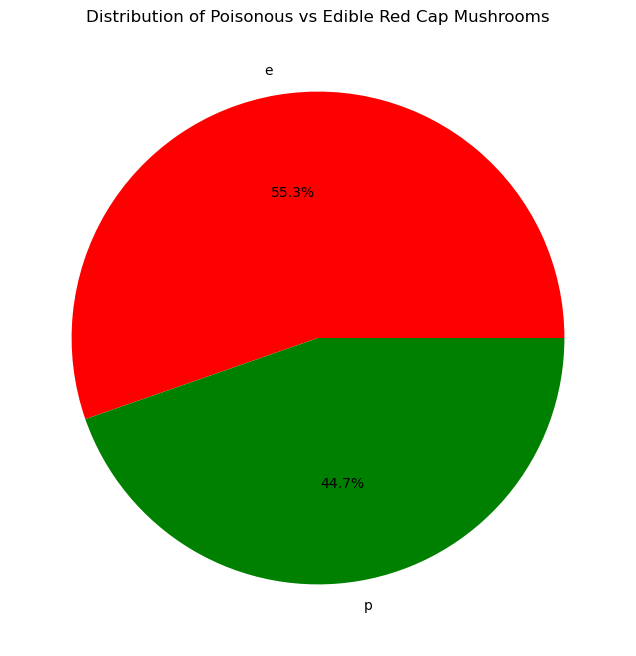

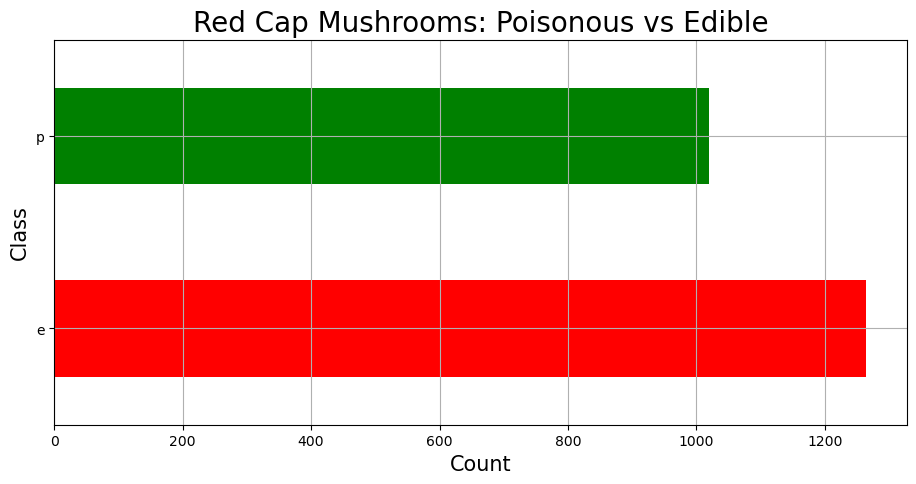

In [13]:
# Ensure plots are rendered inline in the notebook
%matplotlib inline

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
    'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

data = pd.read_csv(url, header=None, names=column_names)

# Filter the data for 'red' cap-color
red_cap_mushrooms = data[data['cap-color'] == 'n']  # 'n' is for red in the provided dataset

# Calculate counts for 'class' (edible vs poisonous)
class_counts = red_cap_mushrooms['class'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Distribution of Poisonous vs Edible Red Cap Mushrooms')
plt.show()

# Plot horizontal bar chart
plt.figure(figsize=(11, 5))
class_counts.plot(kind='barh', grid=True, color=['red', 'green'])
plt.xlabel('Count', fontsize=15)
plt.ylabel('Class', fontsize=15)
plt.title('Red Cap Mushrooms: Poisonous vs Edible', fontsize=20)
plt.show()


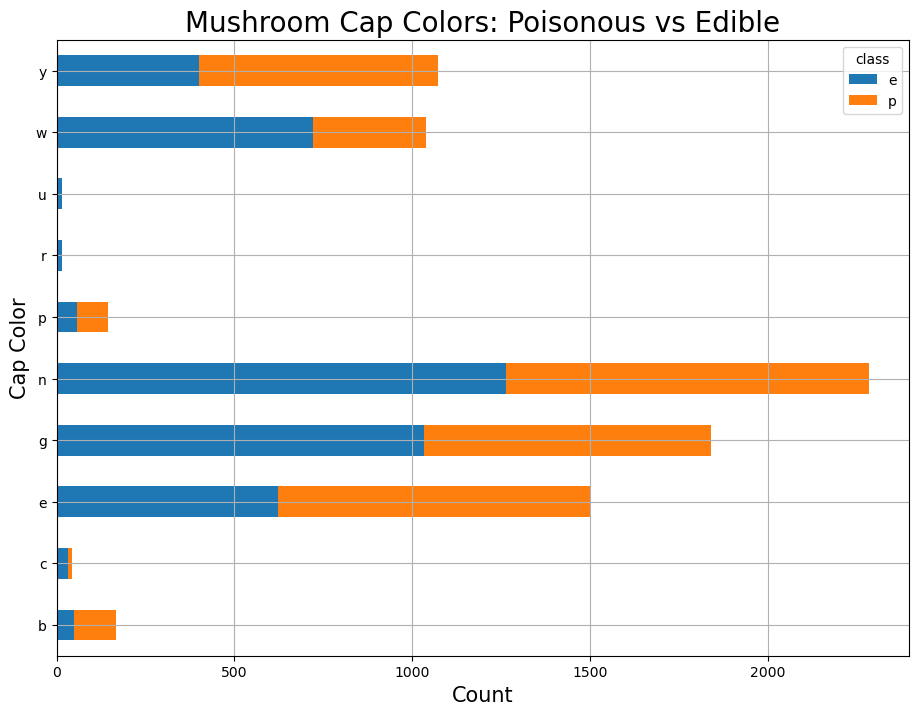

In [22]:
# Group by 'cap-color' and 'class', and count occurrences
cap_color_class_counts = data.groupby(['cap-color', 'class']).size().unstack().fillna(0)

# Plot the horizontal bar chart
cap_color_class_counts.plot(kind='barh', stacked=True, figsize=(11, 8), grid=True)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Cap Color', fontsize=15)
plt.title('Mushroom Cap Colors: Poisonous vs Edible', fontsize=20)
plt.show()